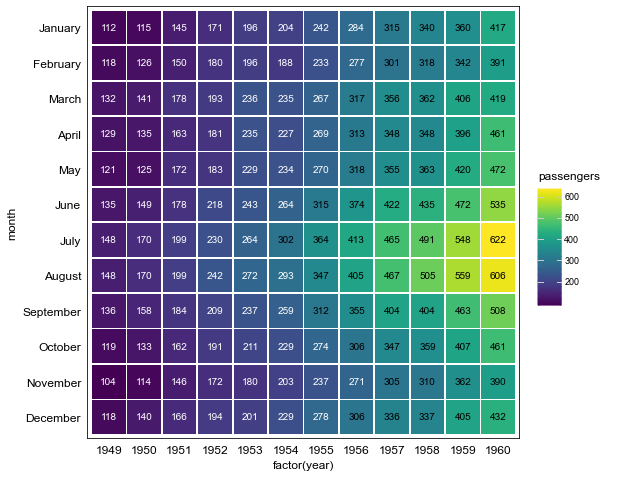

In [4]:
import os
import time
import pandas as pd
import patchworklib as pw
import numpy as np
from plotnine import *
from plotnine.data import *
t0 = time.time()
quick = True

if "flights.csv" in os.listdir():
    pass
else:
    os.system("wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv")
flights = pd.read_csv('flights.csv')
months = flights['month'].unique()  # Months ordered January, ..., December
flights['month'] = pd.Categorical(flights['month'], categories=months)
flights.head()
text_color = np.array(['black']*len(flights))
text_color[flights['passengers']<300] = 'white'
g = (ggplot(flights, aes('factor(year)', 'month', fill='passengers'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='passengers'), size=10, color=text_color)
 + scale_y_discrete(limits=months[::-1])    
 + theme_matplotlib()    
 + theme(                                         
     axis_ticks=element_blank(),
     panel_background=element_rect(fill='white'))
)
g1 = pw.load_ggplot(g, figsize=(6,6))
g1.savefig(quick=quick)

In [ ]:
print(g)